# 1st

In [1]:
# add to path
import sys
sys.path.append('YOLOX')


from torchvision import models
from torchsummary import summary
import torch

from YOLOX.yolox.models.yolox import YOLOX

In [2]:
backbone = torch.load("yolox_nano.pth")
model = YOLOX(backbone)
summary(model, input_size=(3, 416, 416))

TypeError: 'dict' object is not callable

In [5]:
"  ".join(model.__dir__())

'T_destination  __annotations__  __call__  __class__  __delattr__  __dict__  __dir__  __doc__  __eq__  __format__  __ge__  __getattr__  __getattribute__  __gt__  __hash__  __init__  __init_subclass__  __le__  __lt__  __module__  __ne__  __new__  __reduce__  __reduce_ex__  __repr__  __setattr__  __setstate__  __sizeof__  __str__  __subclasshook__  __weakref__  _apply  _backward_hooks  _buffers  _call_impl  _forward_hooks  _forward_pre_hooks  _get_backward_hooks  _get_name  _is_full_backward_hook  _load_from_state_dict  _load_state_dict_pre_hooks  _maybe_warn_non_full_backward_hook  _modules  _named_members  _non_persistent_buffers_set  _parameters  _register_load_state_dict_pre_hook  _register_state_dict_hook  _replicate_for_data_parallel  _save_to_state_dict  _slow_forward  _state_dict_hooks  _version  add_module  apply  backbone  bfloat16  buffers  children  cpu  cuda  double  dump_patches  eval  extra_repr  float  forward  get_buffer  get_extra_state  get_parameter  get_submodule  ha

In [2]:
m = YOLOX()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# m.to(device)
m.to("cpu")
summary(m, input_size=(3, 206, 206), device="cpu")

AttributeError: 'dict' object has no attribute 'size'

# 2nd

In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
# add to path
import sys
sys.path.append('YOLOX')


from torchvision import models
from torchsummary import summary
import torch

from YOLOX.yolox.utils.checkpoint import load_ckpt
from YOLOX.yolox.models.yolox import YOLOX

In [3]:
model = load_ckpt(YOLOX(), torch.load("checkpoints/yolox_nano.pth"));
model.eval();

2021-12-31 20:49:30.669 | WARNING  | YOLOX.yolox.utils.checkpoint:load_ckpt:16 - backbone.backbone.stem.conv.conv.weight is not in the ckpt. Please double check and see if this is desired.
2021-12-31 20:49:30.673 | WARNING  | YOLOX.yolox.utils.checkpoint:load_ckpt:16 - backbone.backbone.stem.conv.bn.weight is not in the ckpt. Please double check and see if this is desired.
2021-12-31 20:49:30.674 | WARNING  | YOLOX.yolox.utils.checkpoint:load_ckpt:16 - backbone.backbone.stem.conv.bn.bias is not in the ckpt. Please double check and see if this is desired.
2021-12-31 20:49:30.674 | WARNING  | YOLOX.yolox.utils.checkpoint:load_ckpt:16 - backbone.backbone.stem.conv.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2021-12-31 20:49:30.675 | WARNING  | YOLOX.yolox.utils.checkpoint:load_ckpt:16 - backbone.backbone.stem.conv.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2021-12-31 20:49:30.676 | WARNING  | YOLOX.yolox.utils

In [5]:
# load image from data
import torch
from torchvision import datasets, transforms
dataset = datasets.ImageFolder('data/train_images', transform=transforms.ToTensor())
one_image = dataset.__getitem__(0)[0]

In [8]:
display(one_image.shape)
new_image = one_image.reshape(1, 3, one_image.shape[1], one_image.shape[2])
# resize the image to 384x640
new_image = torch.nn.functional.interpolate(new_image, size=(190, 190), mode='bilinear', align_corners=False)
display(new_image.shape)
model.eval();
model.cpu();
res = model(new_image);
res_det = res.detach().numpy()
res_det.shape
# "  ".join(res.__dir__())

torch.Size([3, 720, 1280])

torch.Size([1, 3, 190, 190])

(1, 756, 85)

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from YOLOX.yolox.utils.visualize import vis

img_vis = vis(new_image.numpy(), res_det[0, :, 1:5], res_det[0, :, 0], np.argmax(res_det[0, :, 5:], axis=1), class_names=[i for i in range(0, 80)])
#show img
# plt.show()
# plt.imshow(img_vis[0, 1, :, :])
# plt.show()
# cv2.imshow('img', img_vis[0, 1, :, :])

The X11 connection broke (error 1). Did the X11 server die?


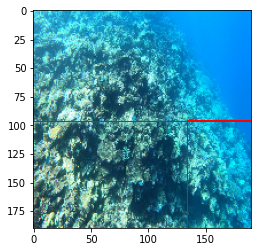

In [8]:
# show image
import matplotlib.pyplot as plt
plt.imshow(new_image[0, :, :, :].permute(1, 2, 0).detach().numpy())

res_numpy = res.detach().numpy()
# plot yolo boxes
import matplotlib.patches as patches
for i in range(res_numpy.shape[0]):
    for j in range(res_numpy.shape[0]):
        for k in range(res_numpy.shape[1]):
            if res_numpy[j, k, 0] > 0.5:
                # print(res2[j, k, :])
                xmin = res_numpy[j, k, 1] * new_image.shape[3]
                ymin = res_numpy[j, k, 2] * new_image.shape[2]
                xmax = res_numpy[j, k, 3] * new_image.shape[3]
                ymax = res_numpy[j, k, 4] * new_image.shape[2]
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
                plt.gca().add_patch(rect)

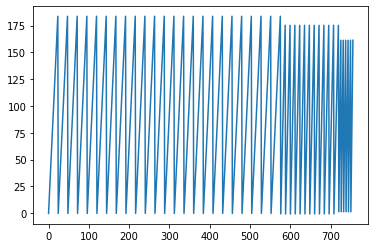

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# plt.plot((res2[0,:, 1].detach().numpy()), (res2[0,:, 2].detach().numpy()), ".")
# plt.plot(res2[0,:, 1], res2[0,:, 2], ".")
plt.plot(res2[0,:, 0] )
# plt.plot()
plt.show()